In [1]:
from warnings import filterwarnings

import pandas as pd
import numpy as np


from warnings import filterwarnings

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from random import sample
from collections import defaultdict
from statistics import median

In [10]:
df = pd.read_csv('data.csv')  
df

,INITIALS,SEX,WBC,LYC %,ABS LYC,MONO %,BLAST %,HLA DR+/14+,HLA DR-/14+,HLA DR-/14-,...,CD16-/CD56+/CD3-/CD117+,ABS.137,CD16+/CD56+/CD3-/CD117+,ABS.138,CD16-/CD56-/CD3+/CD117+,ABS.139,CD16-/CD56+/CD3+/CD117+,ABS.140,CD16+/CD56+/CD3+/CD117+,ABS.141
0,MA,F,5400,26.3,1420,7.7,0.0,72.0,20.1,3.0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
1,CD,F,5500,28.0,1540,7.7,0.0,86.5,9.8,1.2,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
2,WM,M,7900,28.6,2259,5.8,0.0,86.5,8.0,3.6,...,0.1,2,0.0,0,0.2,5,0.0,0,0.0,0
3,DH,F,7300,48.4,3533,6.2,0.0,85.6,6.4,1.6,...,0.0,0,0.1,4,0.1,4,0.0,0,0.0,0
4,BB,M,9800,31.7,3107,8.8,0.0,72.1,20.6,2.4,...,0.0,0,0.0,0,0.1,3,0.0,0,0.0,0
5,LR,F,9800,27.9,2734,6.2,0.1,72.3,23.2,3.5,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
6,BR,F,4900,27.3,1338,5.2,0.0,91.4,0.4,2.0,...,0.1,1,0.0,0,0.2,3,0.1,1,0.0,0
7,GL,M,6800,28.9,1965,9.5,0.0,82.8,14.9,1.0,...,0.1,2,0.0,0,0.1,2,0.0,0,0.0,0
8,SV,F,9000,36.2,3258,6.9,0.0,68.3,25.9,2.9,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
9,LV,F,3400,39.7,1350,8.9,0.1,98.0,0.4,0.5,...,0.1,1,0.0,0,0.2,3,0.0,0,0.0,0


In [11]:
target = 'SEX'

#remove ABS from dataset
cols = [c for c in df.columns if c.lower()[:3] != 'abs']
df=df[cols]

labels = df[target].values
del df[target]
df = df[df.select_dtypes([np.number]).columns].dropna(axis=1)
df

,WBC,LYC %,MONO %,BLAST %,CD3-/CD5616+,CD3+/CD5616-,CD19+,CD3+/CD69+,CD3+/134+,CD3+/HLA DR+,...,CD3+ ONLY,CD16+/CD56-/CD3+/CD117-,CD16-/CD56+/CD3+/CD117-,CD16+/CD56+/CD3+/CD117-,CD16+/CD56-/CD3+/CD117+,CD16-/CD56+/CD3-/CD117+,CD16+/CD56+/CD3-/CD117+,CD16-/CD56-/CD3+/CD117+,CD16-/CD56+/CD3+/CD117+,CD16+/CD56+/CD3+/CD117+
0,5400,26.3,7.7,0.0,19.2,70.8,5.3,1.7,0.7,4.7,...,67.3,0.2,3.1,0.2,0.0,0.0,0.0,0.0,0.0,0.0
1,5500,28.0,7.7,0.0,10.9,65.0,17.9,2.3,0.5,1.1,...,62.8,0.0,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7900,28.6,5.8,0.0,10.3,68.5,15.1,2.1,0.5,1.0,...,72.5,0.0,3.9,0.0,0.0,0.1,0.0,0.2,0.0,0.0
3,7300,48.4,6.2,0.0,9.6,77.1,9.6,1.0,1.1,0.9,...,74.9,0.3,5.5,0.2,0.0,0.0,0.1,0.1,0.0,0.0
4,9800,31.7,8.8,0.0,21.0,64.6,11.0,0.9,0.8,2.6,...,63.8,0.1,1.1,0.0,0.0,0.0,0.0,0.1,0.0,0.0
5,9800,27.9,6.2,0.1,16.6,64.5,15.5,0.6,0.6,1.0,...,66.3,0.1,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4900,27.3,5.2,0.0,8.1,77.9,8.4,2.0,1.5,2.2,...,73.5,1.8,3.9,2.3,0.0,0.1,0.0,0.2,0.1,0.0
7,6800,28.9,9.5,0.0,12.4,62.8,17.8,1.0,1.3,2.4,...,61.5,0.4,3.0,0.4,0.0,0.1,0.0,0.1,0.0,0.0
8,9000,36.2,6.9,0.0,6.4,66.4,23.6,1.0,3.2,4.5,...,65.4,0.1,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3400,39.7,8.9,0.1,11.2,73.1,13.1,1.0,6.9,2.3,...,74.5,0.1,0.9,0.0,0.0,0.1,0.0,0.2,0.0,0.0


In [12]:
labels

array(['F', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'F', 'F', 'F', 'M',
       'F', 'F', 'F', 'M', 'F', 'F', 'F', 'F', 'F', 'M', 'M', 'F', 'M',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'M',
       'F', 'F', 'F', 'F', 'M', 'F', 'M', 'M', 'M', 'F', 'M', 'M'],
      dtype=object)

In [13]:
def get_best_k_features(forest, train_features, k, plot=True):
    importances = forest.feature_importances_
    indices = np.argsort(importances)[::-1]

    # std = np.std([tree.feature_importances_ for tree in forest.estimators_],
    #              axis=0)

    print("*************** Features ranking ***************")
    x = []
    y = []
    i = 0
    for f in range(train_features.shape[1]):
        if i == k:
            break
        i += 1
        print("%d. feature: %s (%f)" % (f + 1, train_features.columns[indices[f]], importances[indices[f]]))
        x.append(train_features.columns[indices[f]])
        y.append(importances[indices[f]])

    if plot:
        x_pos = [i for i, _ in enumerate(x)]
        plt.barh(x_pos, y, color='green')
        # xerr=std**2
        plt.ylabel("Feature")
        plt.xlabel("Importance")
        plt.title(str(k) + " selected features")
        plt.yticks(x_pos, x)
        plt.show()

    return x

In [14]:
def test_classifiers(data, labels):
    X_train, X_test, Y_train, Y_test = train_test_split(data, labels,
                                                        test_size=0.2,
                                                        random_state=42)
    svm = SVC()
    nn = MLPClassifier(max_iter=1000)
    rf = RandomForestClassifier(n_jobs=-1)
    classifiers = {"svm": svm, "nn": nn, "rf": rf}
    cls_params = {"svm": {'kernel': ('linear', 'rbf', 'sigmoid', 'poly'),
                          'C': [.001, .01, .1, .5, 1, 2, 5, 10]},
                  "nn": {'activation': ['relu', 'tanh', 'logistic'],
                         'hidden_layer_sizes': [(100,), (10, 50, 2), (50, 100, 2), (10, 10, 20, 2), (200,), (300, 2),
                                                (300,)],
                         'solver': ['adam'],
                         'learning_rate': ['adaptive', 'invscaling', 'adaptive', 'constant'],
                         'warm_start': [True, False]},
                  "rf": {'n_estimators': [50, 100, 200, 300, 400, 500],
                         'criterion': ['gini', 'entropy']}
                  }

    for k, v in classifiers.items():
        cv = GridSearchCV(v, cls_params[k], cv=5, n_jobs=-1)
        cv.fit(X_train, Y_train)
        pred = cv.predict(X_test)
        print("***** ", k, " ****")
        print('f1: ', f1_score(Y_test, pred, average="macro"))
        print('recall: ', recall_score(Y_test, pred, average="macro"))
        print('accuracy: ', accuracy_score(Y_test, pred))
        print('best params: ', cv.best_params_)


def correlaion_based_fs(data, method, threshold=0.9):
    corr = data.corr(method=method)

    to_drop = []
    for i, f1 in enumerate(data.columns):
        for j, f2 in enumerate(data.columns):
            if i > j and abs(corr.iloc[i, j]) > threshold:
                to_drop.append(f1)
    plt.subplots(figsize=(50, 50))
    sns.heatmap(corr, vmax=1.0, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .70})
    plt.show()
    return list(set(data.columns) - set(to_drop))


def test_algo(data, algo="rf"):
    
    target = 'SEX'
    k = 10
    if algo == "rf":
        forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
        train_features, test_features, train_labels, test_labels = train_test_split(data, labels,
                                                                                    test_size=0.2,
                                                                                    random_state=42)
        forest.fit(train_features, train_labels)
        first_k_features = get_best_k_features(forest, train_features, k)

        test_classifiers(data[first_k_features], labels)

    elif algo == "corr_spearman":
        selected_features = correlaion_based_fs(data, "spearman")
        test_classifiers(data[selected_features], labels)

    elif algo == "corr_kendall":
        selected_features = correlaion_based_fs(data, "kendall")
        test_classifiers(data[selected_features], labels)

    elif algo == "pearson":
        selected_features = correlaion_based_fs(data, "pearson")
        test_classifiers(data[selected_features], labels)

    else:
        raise Exception("Unknown algorithm")


*************** Features ranking ***************
1. feature: MONO % (0.039830)
2. feature: CD16+/CD56+/CD3-/CD117- (0.025148)
3. feature: CD3+/CD159a+ (0.024765)
4. feature: TOTAL CD4+ (0.024518)
5. feature: CD3+/AB+ (0.021617)
6. feature: CD3-/CD5616+/CD314+ (0.019668)
7. feature: CD3-/CD5616+/CD159a+ (0.018351)
8. feature: CD3-/CD5616+ (0.015885)
9. feature: CD4+/CD45RO+/CD29+ (0.015044)
10. feature: CD4+/CD294+/CD194+ (0.014673)


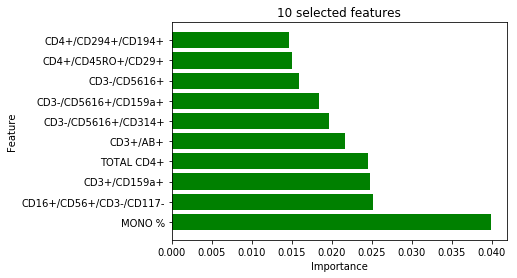

*****  svm  ****
f1:  0.8035714285714285
recall:  0.875
accuracy:  0.8181818181818182
best params:  {'C': 0.1, 'kernel': 'linear'}
*****  nn  ****
f1:  0.6333333333333333
recall:  0.75
accuracy:  0.6363636363636364
best params:  {'activation': 'logistic', 'hidden_layer_sizes': (50, 100, 2), 'learning_rate': 'invscaling', 'solver': 'adam', 'warm_start': False}
*****  rf  ****
f1:  0.8035714285714285
recall:  0.875
accuracy:  0.8181818181818182
best params:  {'criterion': 'gini', 'n_estimators': 200}


In [15]:
filterwarnings('ignore')
test_algo(df, algo="rf")

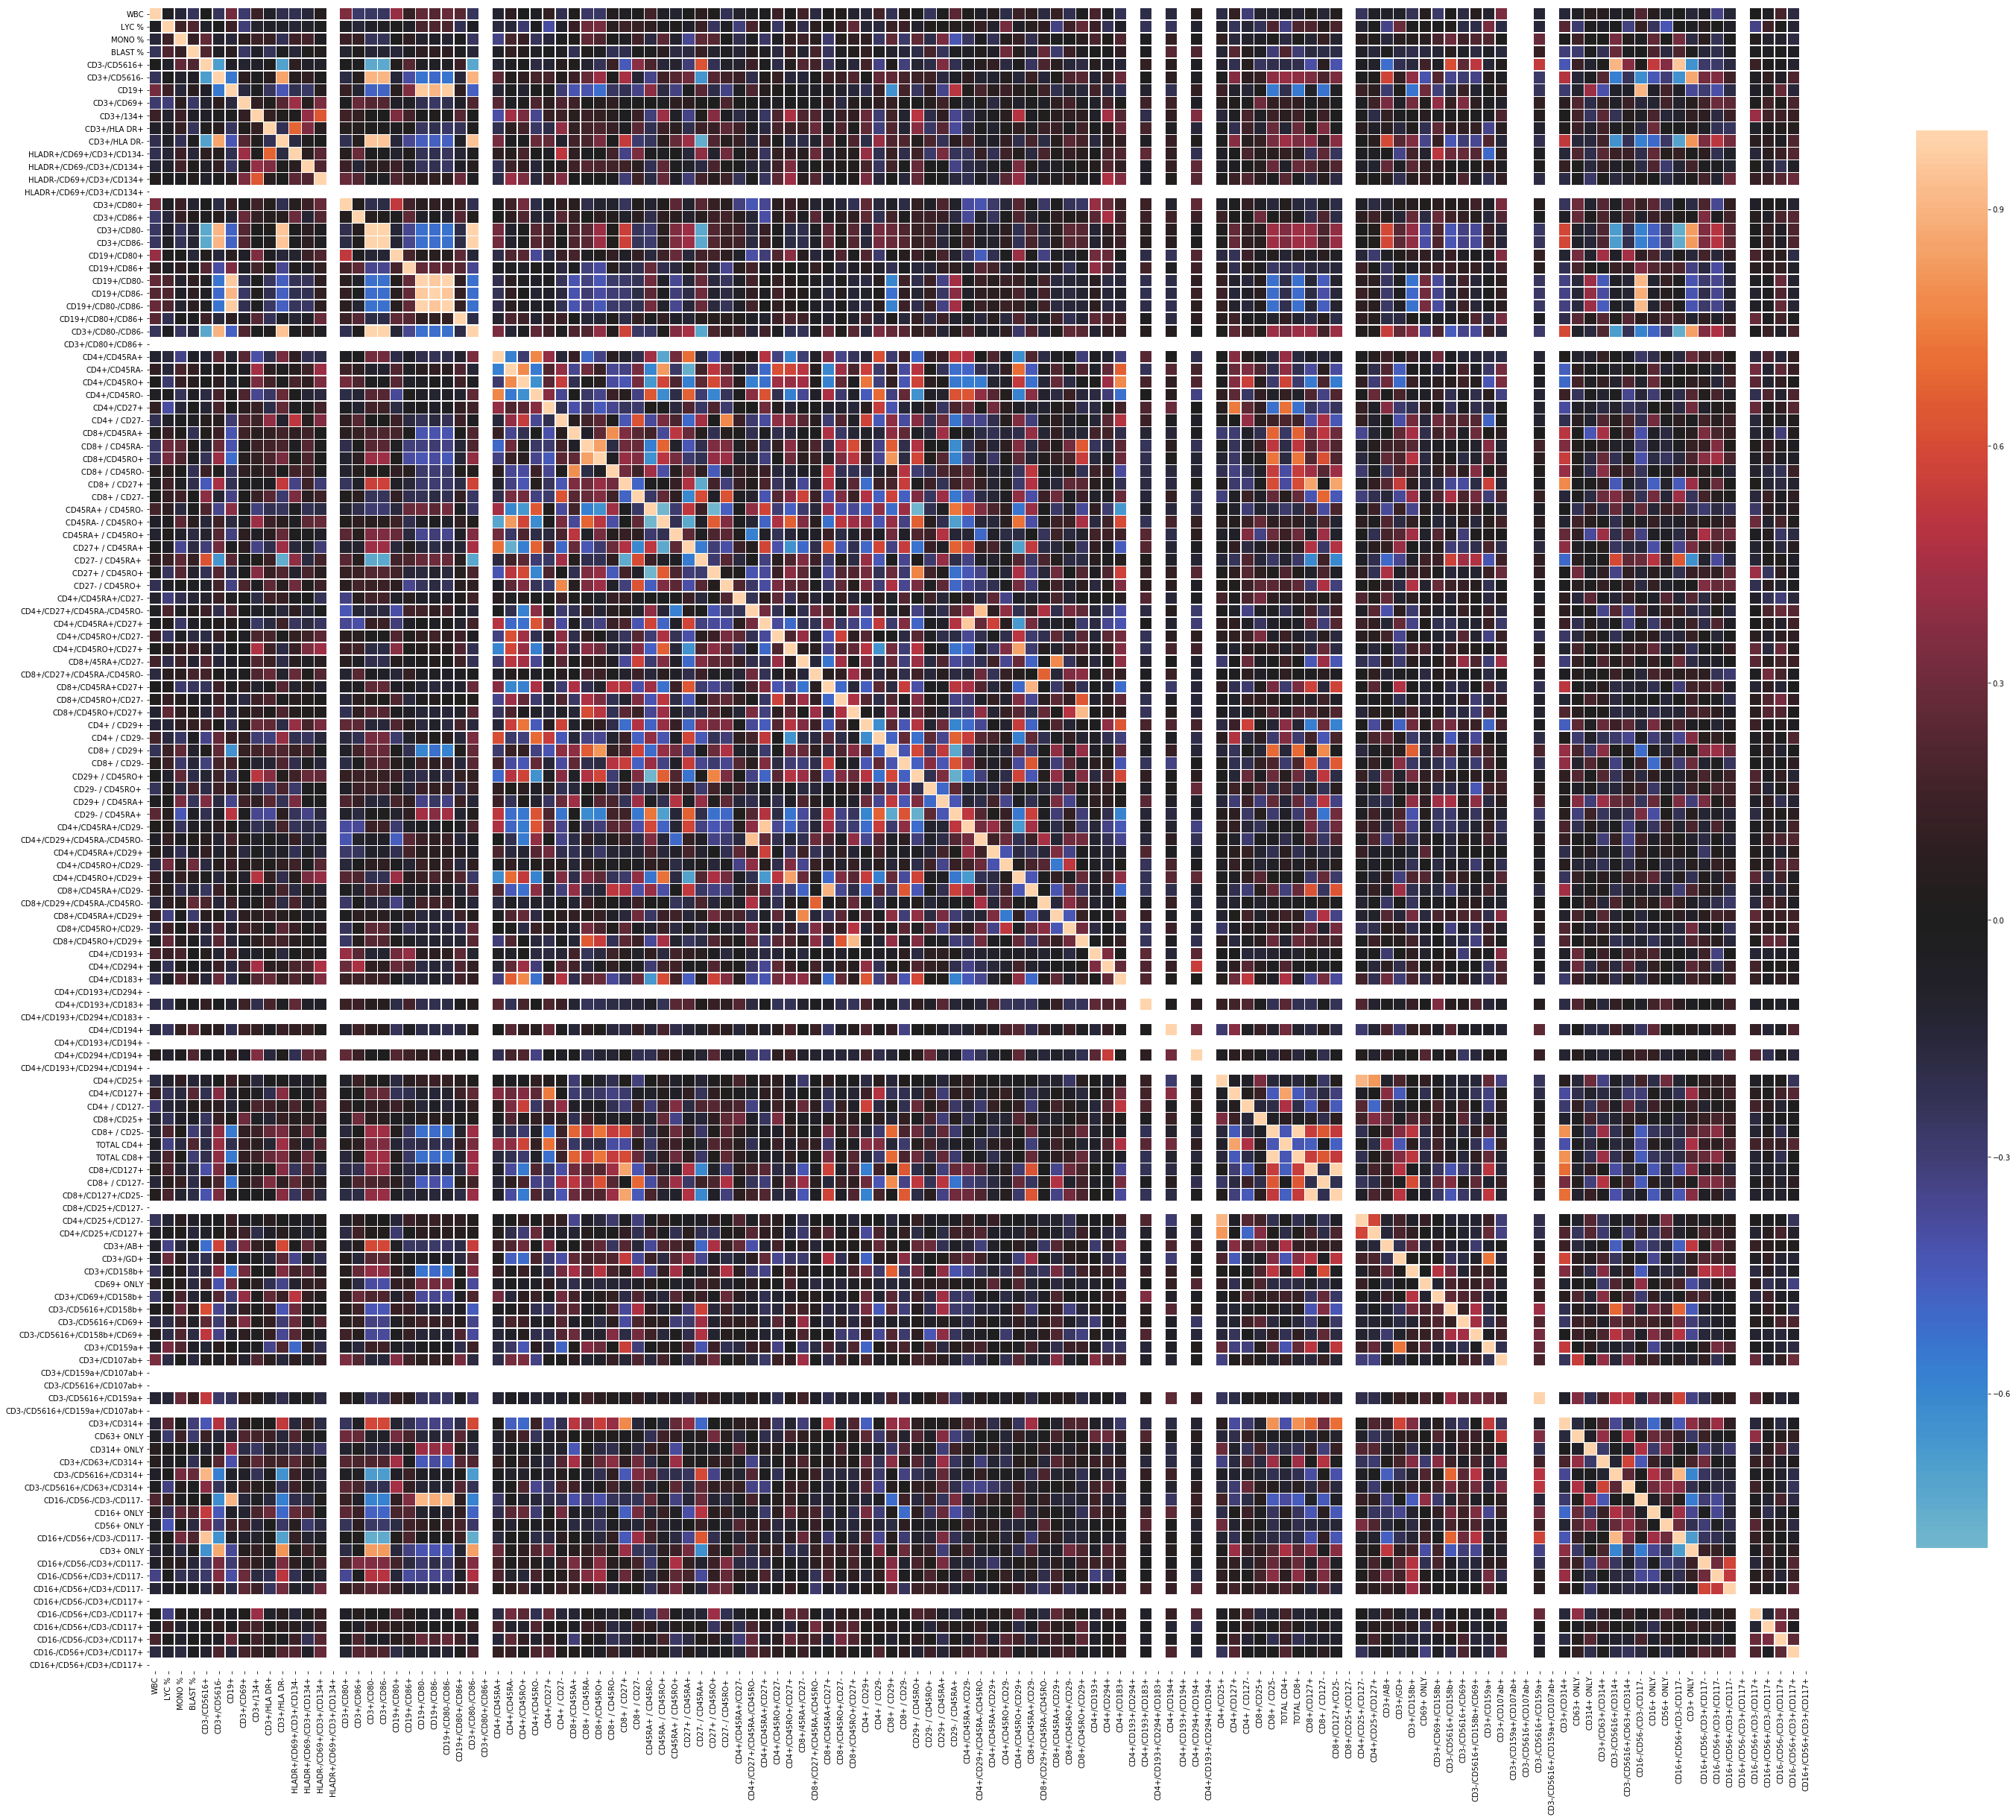

*****  svm  ****
f1:  0.8952380952380952
recall:  0.9375
accuracy:  0.9090909090909091
best params:  {'C': 0.01, 'kernel': 'linear'}
*****  nn  ****
f1:  0.36363636363636365
recall:  0.4583333333333333
accuracy:  0.36363636363636365
best params:  {'activation': 'relu', 'hidden_layer_sizes': (200,), 'learning_rate': 'invscaling', 'solver': 'adam', 'warm_start': False}
*****  rf  ****
f1:  0.6944444444444444
recall:  0.6666666666666666
accuracy:  0.8181818181818182
best params:  {'criterion': 'gini', 'n_estimators': 200}


In [16]:
test_algo(df, algo="corr_spearman")

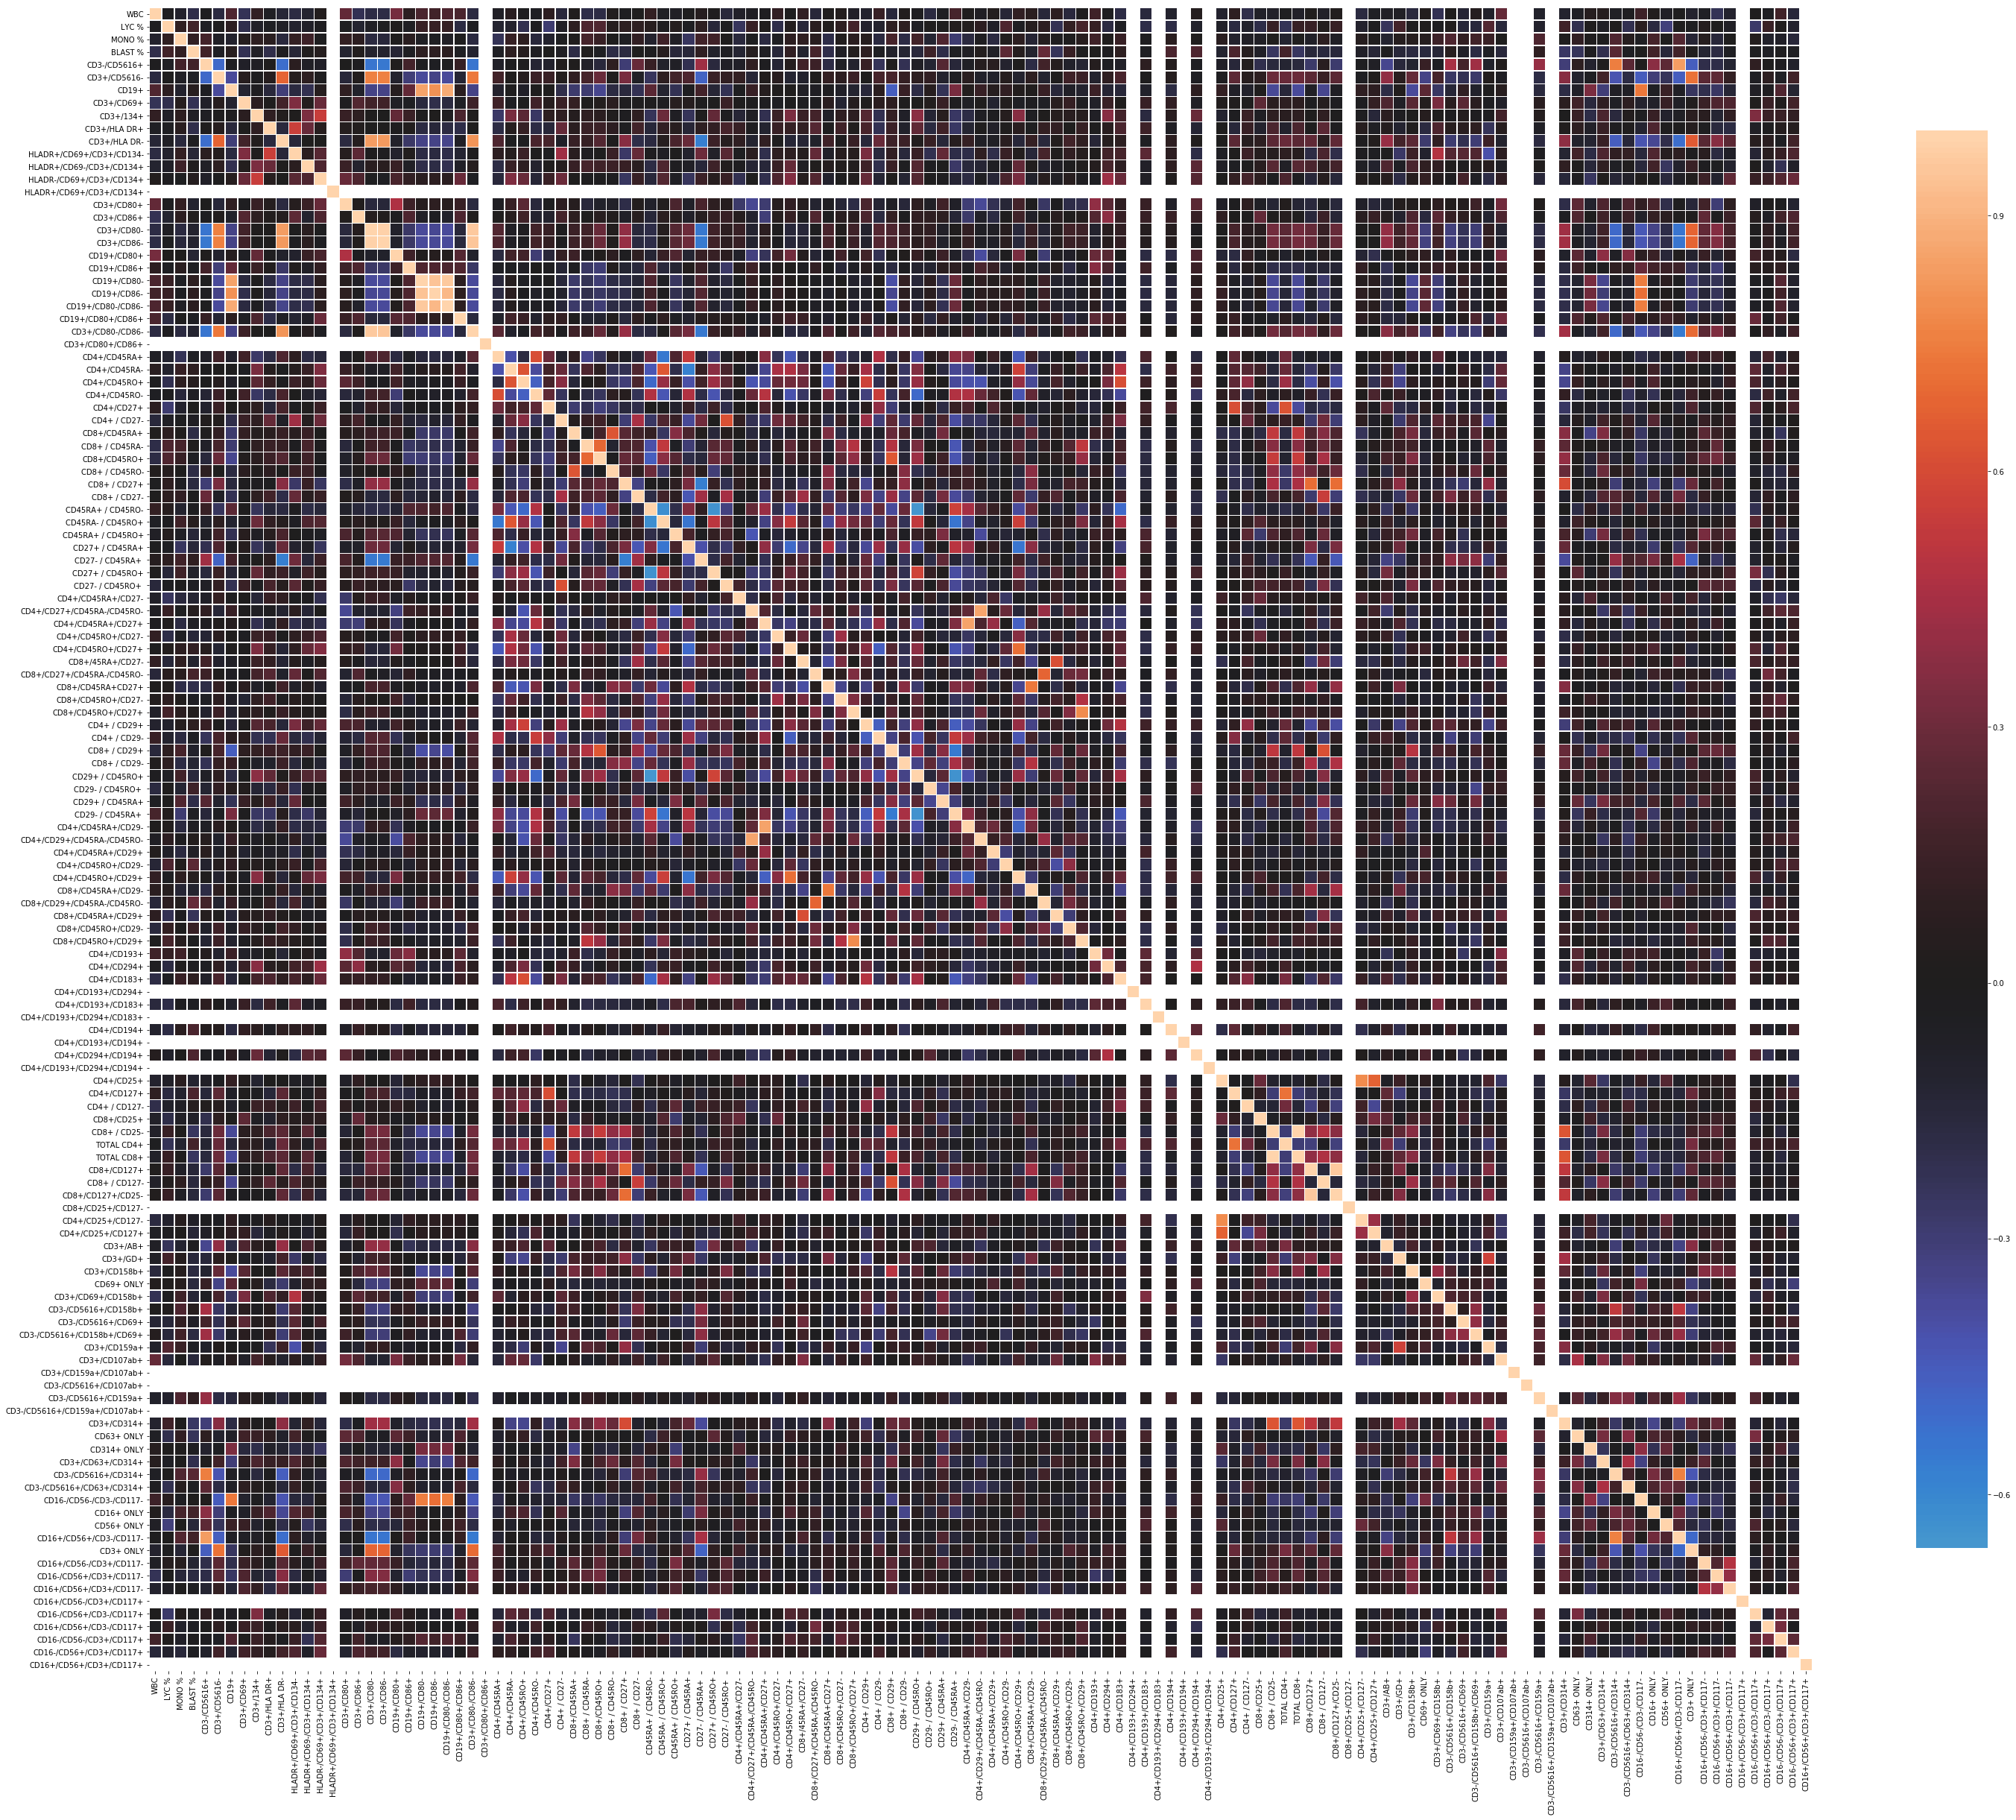

*****  svm  ****
f1:  0.8035714285714285
recall:  0.875
accuracy:  0.8181818181818182
best params:  {'C': 0.01, 'kernel': 'linear'}
*****  nn  ****
f1:  0.4210526315789474
recall:  0.5
accuracy:  0.7272727272727273
best params:  {'activation': 'tanh', 'hidden_layer_sizes': (300,), 'learning_rate': 'invscaling', 'solver': 'adam', 'warm_start': True}
*****  rf  ****
f1:  1.0
recall:  1.0
accuracy:  1.0
best params:  {'criterion': 'gini', 'n_estimators': 400}


In [17]:
test_algo(df, algo="corr_kendall")

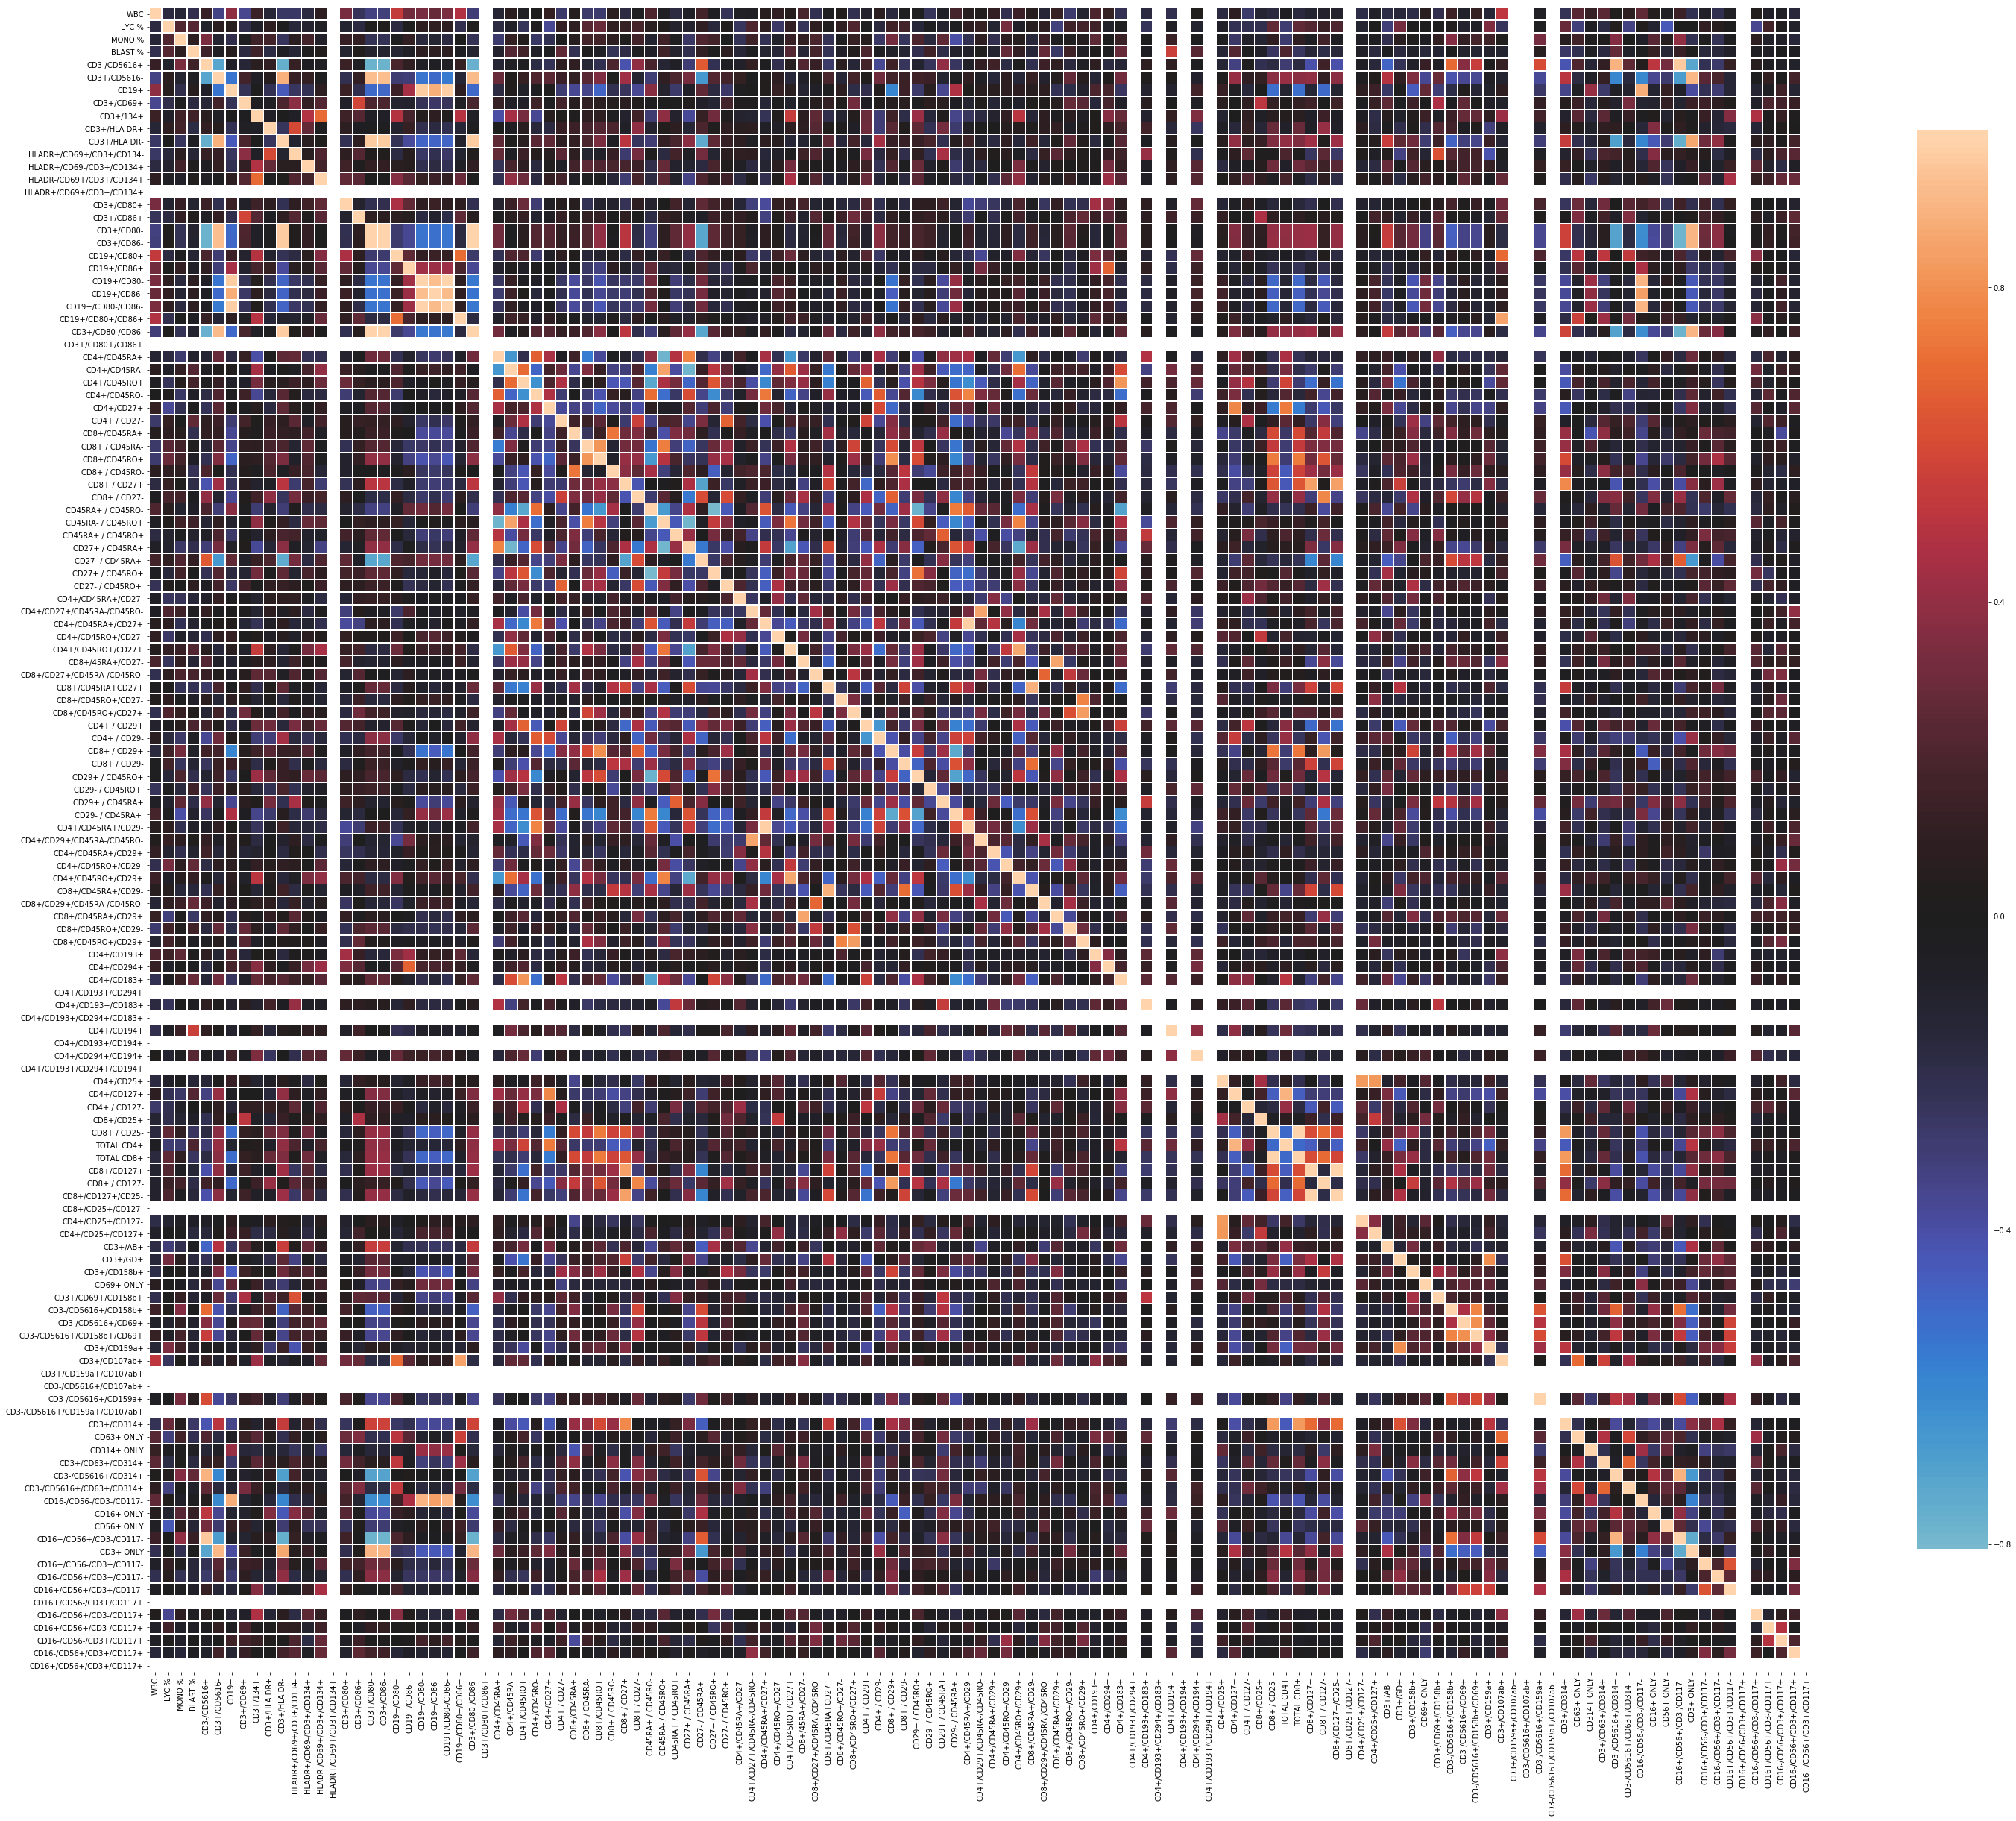

*****  svm  ****
f1:  0.8952380952380952
recall:  0.9375
accuracy:  0.9090909090909091
best params:  {'C': 0.001, 'kernel': 'linear'}
*****  nn  ****
f1:  0.4210526315789474
recall:  0.5
accuracy:  0.7272727272727273
best params:  {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam', 'warm_start': False}
*****  rf  ****
f1:  0.8952380952380952
recall:  0.9375
accuracy:  0.9090909090909091
best params:  {'criterion': 'gini', 'n_estimators': 50}


In [18]:
test_algo(df, algo="pearson")

#### Info Based

In [2]:
target_label = 'SEX'
k = 30

In [3]:
df = pd.read_csv('data.csv')  
df = df.dropna(axis='columns')
df_male = df[df[target_label] == 'M']
df_female = df[df[target_label] == 'F']
to_delete = ['SEX', 'INITIALS']
for col in df.columns:
    if col.startswith('ABS'):
        to_delete.append(col)
for c in to_delete:
    del df_male[c]
    del df_female[c]
# df_male.to_csv('male.csv')
# df_female.to_csv('female.csv')

In [4]:
df_case = df_male
df_control = df_female 
features_num = df_case.shape[1]
features_num

131

In [5]:
def iind(matrix, alpha = .5):
    p = alpha
    matrix = matrix[matrix.sum(axis = 1) > 0.0]
    s = matrix.values.sum()
    if s == 0:
        raise Exception('Sum of matrix is equal to 0')
    matrix = matrix / s
    m1 = matrix.sum(axis = 1)
    m2 = matrix.sum(axis = 0)
    outer_p = np.outer(m1, m2) 
    factor = 1 / (p-1)
    s = np.divide(np.power(matrix,p),np.power(outer_p,(p-1))).sum().sum()
    dividend = np.log(s)
    divisor = (np.log(np.sum(np.power(m2,(2-p)))))
    return dividend / divisor  

In [6]:
# feature_subset = sample(range(features_num), k)
def leave_one_out(m_case, m_control,feature_subset, row_num):
    a = m_case.iloc[[row_num],feature_subset]
    b = m_control.iloc[:,feature_subset]
    partial_res = iind(a.append(b, ignore_index=True)) - iind(m_control.iloc[:,feature_subset])
    results = []
    
    for i, feature_num in enumerate(feature_subset):
        c = feature_subset.copy()
        c.remove(feature_num)
        a1 = m_case.iloc[[row_num], c]
        b1 = m_control.iloc[:, c]
        ind = iind(a1.append(b1, ignore_index=True)) - iind(m_control.iloc[:,c])
        results.append(ind)
    res = np.subtract(np.array([partial_res]),  np.array([results]))
    return res[0]


# sprawdzic czy sample losuje z powtorzeniami

In [7]:
def apply_iind(m_case, m_control, features_num, row_num, k):
    feature_subset = sample(range(1,features_num), k)
    try:
        results = leave_one_out(m_case,m_control,feature_subset, row_num)
    except Exception as e:
        print("exception:", e)
        results = np.repeat(np.nan, k)

    return np.r_[np.array(feature_subset), results]

In [9]:
m = pd.read_csv("male.csv")
m2 = pd.read_csv("female.csv")
k = 5
patients =  m.shape[0]
df1 = None
importance_per_patient = dict()

feature_ind_to_name = dict()
for i, e in enumerate(m.columns):
    feature_ind_to_name[i] = e
i = 1
iters = 1000

In [74]:
def plot_score(features_dict, feature_ind_to_name, importance_per_patient):
    features_stat = dict()
    for k,v in features_dict.items():
        features_stat[k] = np.median(v)
    plt.bar(range(len(features_stat)), list(features_stat.values()), align='center')
    plt.xticks(range(len(features_stat)), list(features_stat.keys()))
    plt.show()
    positive_median =list(filter(lambda x: x[1] > 0, features_stat.items()))
    imp_list = list(map(lambda x: x[0], sorted(positive_median, key=lambda x: x[1], reverse=True)))
    summarisation = []
    for imp in imp_list:
        summarisation.append((imp, feature_ind_to_name[imp]))
    print(summarisation)
    importance_per_patient[i] = features_stat


In [75]:
def func_(col, m, m2, features_count, i, k):
    return apply_iind(m, m2, features_count, i, k)

def collect_statistics(col, features_dict, k):
    control_res = col.tolist()
#     print(control_res, type(control_res))
    for row_num, feature_num in enumerate(control_res):
        if row_num == k:
            break
        ind_val = control_res[row_num + k]
        if not np.isnan(ind_val):
            features_dict[int(feature_num)].append(ind_val)


In [76]:
d = pd.DataFrame(np.nan, index=np.arange(2*k), columns=[i+1 for i in range(iters//10)])
d = d.apply(lambda col: func_(col, m, m2, 150, i, k), axis=0)
d

C:\Users\Acer\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in power
  if sys.path[0] == '':
C:\Users\Acer\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Users\Acer\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Acer\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,59.0,69.0,61.000000,87.0,53.000000,87.0,125.000000,148.000000,1.800000e+01,95.0,...,133.000000,18.0,69.0,104.000000,85.0,25.000000,1.390000e+02,3.000000,146.000000,5.400000e+01
1,88.0,2.0,60.000000,99.0,31.000000,133.0,57.000000,128.000000,1.320000e+02,77.0,...,79.000000,51.0,46.0,80.000000,46.0,54.000000,5.600000e+01,33.000000,52.000000,1.200000e+02
2,28.0,84.0,58.000000,19.0,76.000000,6.0,37.000000,16.000000,8.000000e+01,145.0,...,35.000000,113.0,5.0,132.000000,95.0,35.000000,5.400000e+01,143.000000,144.000000,5.600000e+01
3,55.0,79.0,31.000000,105.0,59.000000,83.0,118.000000,41.000000,4.700000e+01,62.0,...,75.000000,39.0,128.0,114.000000,74.0,17.000000,1.600000e+01,132.000000,4.000000,1.800000e+01
4,26.0,18.0,137.000000,78.0,45.000000,8.0,145.000000,22.000000,9.000000e+00,6.0,...,102.000000,103.0,11.0,53.000000,43.0,106.000000,9.300000e+01,49.000000,129.000000,8.200000e+01
5,NaN,NaN,0.000186,NaN,-0.000037,NaN,0.000008,-0.000003,6.938894e-18,NaN,...,-0.000010,NaN,NaN,-0.000013,NaN,-0.000035,-4.425164e-03,-0.000388,0.000101,-1.667315e-03
6,NaN,NaN,0.000139,NaN,0.000011,NaN,0.003772,0.000844,-1.618749e-05,NaN,...,0.000004,NaN,NaN,0.002462,NaN,0.000017,-4.450597e-05,-0.001363,0.002220,1.278166e-03
7,NaN,NaN,-0.000062,NaN,0.000088,NaN,0.002198,-0.000010,7.305080e-04,NaN,...,0.000139,NaN,NaN,0.000025,NaN,0.000044,-9.519675e-03,-0.000019,0.000000,-2.035735e-05
8,NaN,NaN,0.000126,NaN,-0.000045,NaN,-0.000026,-0.001669,-1.972420e-03,NaN,...,-0.000082,NaN,NaN,-0.000162,NaN,-0.000002,-7.219096e-05,-0.000021,-0.000150,-1.481454e-15
9,NaN,NaN,-0.000049,NaN,0.000023,NaN,-0.000011,-0.003131,-4.895972e-03,NaN,...,0.000134,NaN,NaN,0.000152,NaN,0.000069,2.081668e-17,0.000549,0.000000,-4.022632e-03


In [77]:
features_dict = defaultdict(list)
d.apply(lambda col: collect_statistics(col,features_dict, k))

1      None
2      None
3      None
4      None
5      None
       ... 
96     None
97     None
98     None
99     None
100    None
Length: 100, dtype: object

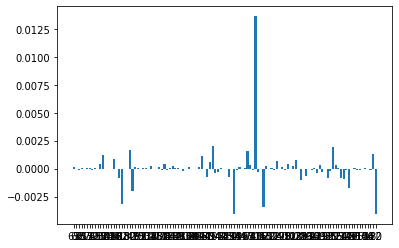

[(43, 'CD45RA+ / CD45RO-'), (1, 'WBC'), (39, 'CD8+/CD45RO+'), (80, 'CD8+/CD45RA+/CD29-'), (67, 'CD8+ / CD29-'), (120, 'CD3-/CD5616+/CD158b+'), (37, 'CD8+/CD45RA+'), (66, 'CD8+ / CD29+'), (128, 'CD3-/CD5616+/CD159a+'), (23, 'CD19+/CD80+'), (2, 'LYC %'), (49, 'CD27- / CD45RO+ '), (8, 'CD3-/CD5616+'), (74, 'CD29- / CD45RA+ '), (57, 'CD8+/CD45RA+CD27+'), (115, 'CD3+/AB+'), (139, 'CD16+/CD56+/CD3-/CD117-'), (71, 'CD29+ / CD45RO+'), (134, 'CD3-/CD5616+/CD314+'), (102, 'CD4+/CD127+'), (122, 'CD3-/CD5616+/CD158b+/CD69+'), (107, 'TOTAL CD8+'), (61, 'CD4+ / CD29-'), (9, 'CD3+/CD5616-'), (110, 'CD8+/CD127+/CD25-'), (141, 'CD16+/CD56-/CD3+/CD117-'), (40, 'CD8+ / CD45RO-'), (130, 'CD3+/CD314+'), (105, 'CD8+ / CD25-'), (83, 'CD8+/CD45RO+/CD29-'), (35, 'CD4+/CD27+'), (44, 'CD45RA- / CD45RO+'), (124, 'CD3+/CD159a+'), (106, 'TOTAL CD4+'), (76, 'CD4+/CD29+/CD45RA-/CD45RO-'), (52, 'CD4+/CD45RA+/CD27+'), (146, 'CD16+/CD56+/CD3-/CD117+'), (27, 'CD19+/CD80-/CD86-'), (84, 'CD8+/CD45RO+/CD29+'), (50, 'CD4+/CD

In [78]:
plot_score(features_dict, feature_ind_to_name, importance_per_patient)

In [ ]:
# TESTS
m_case = 
leave_one_out(m_case, m_control,feature_subset, row_num)